In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix

In [137]:
df=pd.read_csv('https://raw.githubusercontent.com/tranghth-lux/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [9]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [11]:
b=df['sales'].unique()
b

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [20]:
for i in  b:
  a=len(df[df['sales']==i])/len(df)*10
  print(a)

2.760184012267484
0.5113674244949663
0.4926995133008867
1.813454230282019
1.4860990732715516
0.4200280018667911
0.8180545369691312
0.601373424894993
0.572038135875725
0.5247016467764518


In [58]:
fq=df.groupby('sales').size()/len(df)*10
fq

sales
IT             0.818055
RandD          0.524702
accounting     0.511367
hr             0.492700
management     0.420028
marketing      0.572038
product_mng    0.601373
sales          2.760184
support        1.486099
technical      1.813454
dtype: float64

In [138]:
df.loc[:,'fq_sales']=df['sales'].map(fq)

In [139]:
salary={'low':0,'medium':1,'high':2}
df.loc[:,'ec_salary']=df['salary'].map(salary)

In [140]:
df.drop(['sales','salary'],axis=1,inplace=True)

In [89]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,fq_sales,ec_salary
0,0.38,0.53,2,157,3,0,1,0,2.760184,0
1,0.80,0.86,5,262,6,0,1,0,2.760184,1
2,0.11,0.88,7,272,4,0,1,0,2.760184,1
3,0.72,0.87,5,223,5,0,1,0,2.760184,0
4,0.37,0.52,2,159,3,0,1,0,2.760184,0


In [141]:
x=df.drop('left',axis=1)
y=df['left']


In [142]:
xtrain ,xtest , ytrain ,ytest = train_test_split(x,y,test_size=.20)


In [64]:
xtrain.shape ,xtest.shape , ytrain.shape ,ytest.shape

((11999, 9), (3000, 9), (11999,), (3000,))

In [150]:
sc=RobustScaler()

In [151]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [152]:
n=range(1,15)
acc_sc=[]
for i in n:
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  y_pred=knn.predict(xtest)
  acc = accuracy_score(ytest,y_pred)
  acc_sc.append(acc)



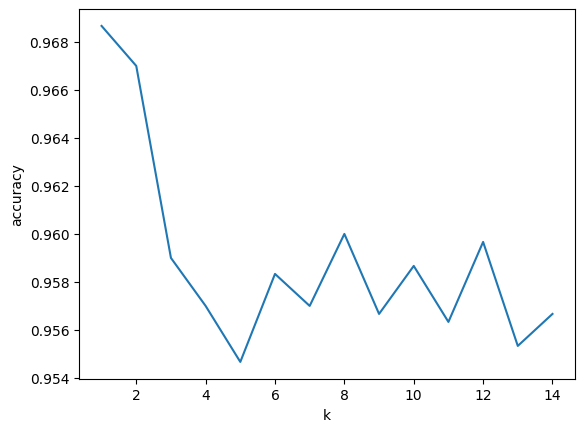

In [153]:

plt.plot(n,acc_sc)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()


In [157]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(xtrain,ytrain)
y_pred=knn.predict(xtest)


In [158]:
confusion_matrix(ytest,y_pred)

array([[2216,   53],
       [  67,  664]])

In [161]:
accuracy_score(ytest,y_pred)*100

96.0